In [3]:
import pandas as pd
beer=pd.read_csv("22_data.txt",sep=" ")
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
#特征列
X=beer[["calories","sodium","alcohol","cost"]]

In [5]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3).fit(X)
km2=KMeans(n_clusters=2).fit(X)

### 查看聚类结果（labels_属性）

In [9]:
print(km.labels_)
print(km2.labels_)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 0 0 2 1]
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1]


In [11]:
beer["km1"]=km.labels_
beer["km2"]=km2.labels_
#结果排序
beer.sort_values("km1")

,name,calories,sodium,alcohol,cost,km1,km2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


In [39]:
from pandas.tools.plotting import scatter_matrix

cluster_centers=km.cluster_centers_
cluster_centers_2=km2.cluster_centers_

In [40]:
print(cluster_centers)

[[-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


In [14]:
beer.groupby("km1").mean()

,calories,sodium,alcohol,cost,km2
km1,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,102.75,10.0,4.075000,0.440000,1
2,70.00,10.5,2.600000,0.420000,1


In [15]:
beer.groupby("km2").mean()

,calories,sodium,alcohol,cost,km1
km2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


拿出中心点

In [16]:
centers=beer.groupby("km1").mean().reset_index()

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
print(centers)

   km1  calories  sodium   alcohol      cost  km2
0    0    150.00    17.0  4.521429  0.520714    0
1    1    102.75    10.0  4.075000  0.440000    1
2    2     70.00    10.5  2.600000  0.420000    1


### 特征之间两两比较(用scatter_matrix)(聚类类别数为3)

D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


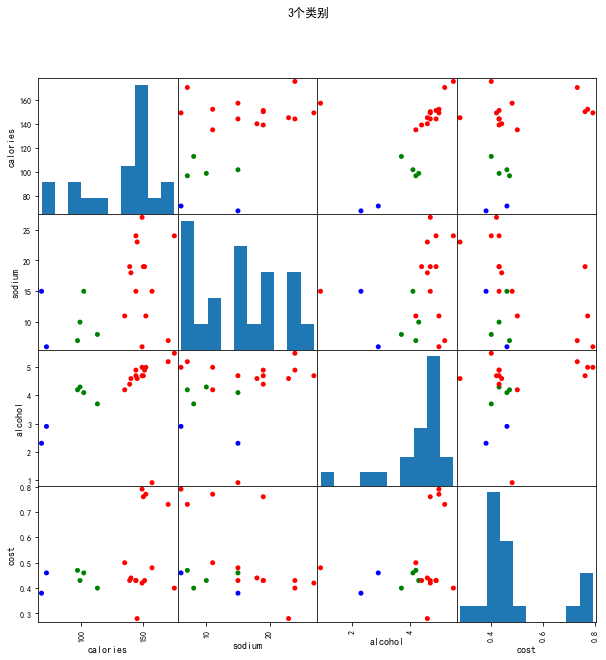

In [25]:
colors = np.array(['red', 'green', 'blue', 'yellow'])
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["km1"]], figsize=(10,10))
plt.suptitle("3个类别")
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

### 聚类类别数为2情况下，特征之间比较

D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


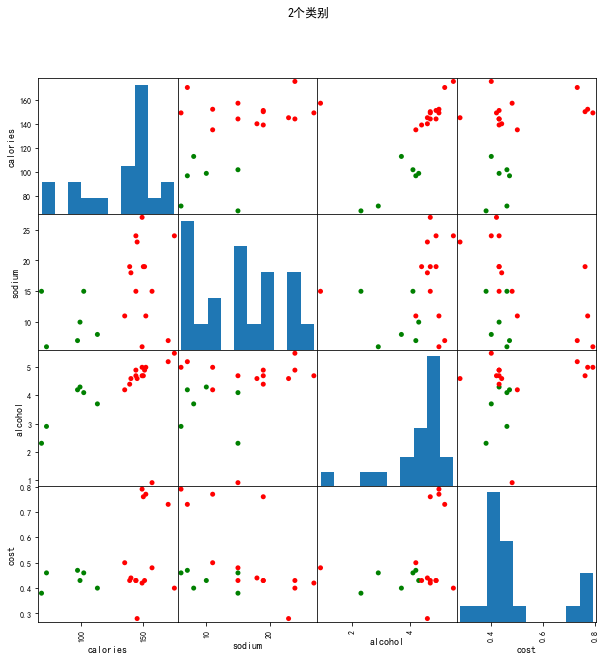

In [24]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["km2"]], figsize=(10,10))
plt.suptitle("2个类别")
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

### 数据标准化

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

### 利用标准化后的数据聚类

In [27]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [28]:
beer["scaled_km1"] = km.labels_
beer.sort_values("scaled_km1")

,name,calories,sodium,alcohol,cost,km1,km2,scaled_km1
9,Budweiser_Light,113,8,3.7,0.40,1,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,0
12,Michelob_Light,135,11,4.2,0.50,0,0,0
11,Coors_Light,102,15,4.1,0.46,1,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,0
8,Miller_Lite,99,10,4.3,0.43,1,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,1,0
2,Lowenbrau,157,15,0.9,0.48,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,0,1


In [29]:
beer.groupby("scaled_km1").mean()

,calories,sodium,alcohol,cost,km1,km2
scaled_km1,,,,,,
0,105.375,10.875,3.3250,0.4475,1.0,0.75
1,148.375,21.125,4.7875,0.4075,0.0,0.00
2,155.250,10.750,4.9750,0.7625,0.0,0.00


D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DCEDB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC49198>]], dtype=object)

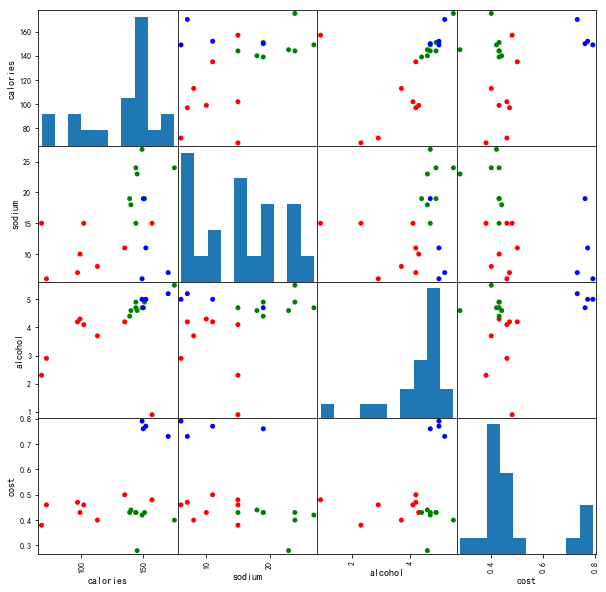

In [30]:
pd.scatter_matrix(X, c=colors[beer.scaled_km1], alpha=1, figsize=(10,10), s=100)

## 聚类评估：轮廓系数（Silhouette Coefficient ）

- ai:样本i到同簇其他样本的平均距离。ai 越小，说明样本i越应该被聚类到该簇。ai 称为样本i的簇内不相似度。
- bij:样本i到其他某簇Cj 的所有样本的平均距离，为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [31]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_km1)
score = metrics.silhouette_score(X,beer.km1)
print(score_scaled, score)

0.179780680894 0.673177504646


以上结果得出结论：  
并不一定做了标准化效果就好，有时标准化后反而效果下降

### 聚类：k值用循环试

In [32]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720218,
 0.45591821670133781,
 0.43776116697963136,
 0.38946337473126003,
 0.39746405172426014,
 0.3915697409245163,
 0.32472080133848924,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

### 肉眼看不够直观，画图观测

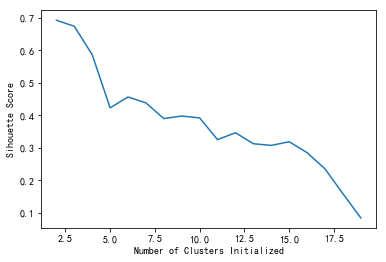

In [33]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

### 换个方法：使用DBSCAN聚类

In [34]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [35]:
labels = db.labels_

In [36]:
beer['DBSCAN_cluster'] = labels
beer.sort_values('DBSCAN_cluster')

,name,calories,sodium,alcohol,cost,km1,km2,scaled_km1,DBSCAN_cluster
9,Budweiser_Light,113,8,3.7,0.40,1,1,0,-1
3,Kronenbourg,170,7,5.2,0.73,0,0,2,-1
6,Augsberger,175,24,5.5,0.40,0,0,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,1,0
16,Hamms,139,19,4.4,0.43,0,0,1,0
14,Kirin,149,6,5.0,0.79,0,0,2,0
13,Becks,150,19,4.7,0.76,0,0,2,0
12,Michelob_Light,135,11,4.2,0.50,0,0,0,0
10,Coors,140,18,4.6,0.44,0,0,1,0
0,Budweiser,144,15,4.7,0.43,0,0,1,0


In [37]:
beer.groupby('DBSCAN_cluster').mean()

,calories,sodium,alcohol,cost,km1,km2,scaled_km1
DBSCAN_cluster,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.333333,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,0.000000,1.083333
1,99.333333,10.666667,4.200000,0.453333,1.000000,1.000000,0.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,1.000000,0.000000


D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EEF4BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010D372E8>]], dtype=object)

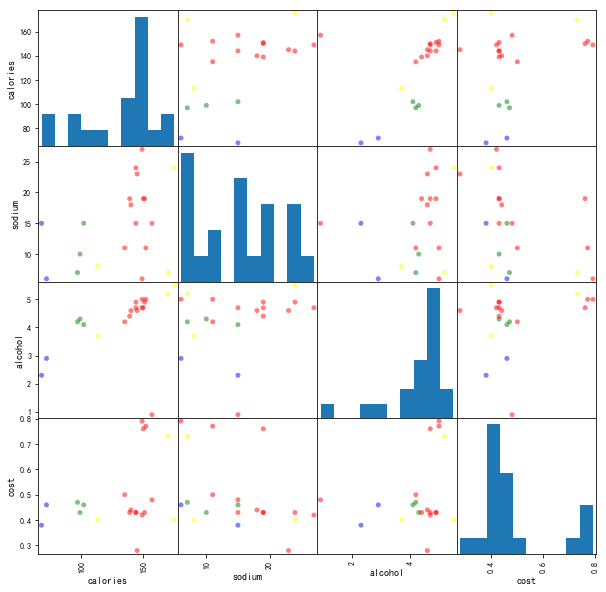

In [38]:
pd.scatter_matrix(X, c=colors[beer.DBSCAN_cluster], figsize=(10,10), s=100)